## Text-to-Image Generation


In [1]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
!pip show torch

Name: torch
Version: 2.5.1+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
prompt = """A futuristic digital world named 'Aorb,' built through the collaboration of Amir from Pakistan and Eric from Poland. The scene showcases a vast cybernetic city with glowing AI-powered structures, holographic data streams, and intelligent robotic assistants. Amir, a visionary AI engineer, is depicted with a high-tech tablet, designing algorithms in mid-air. Eric, a digital architect, is constructing towering virtual skyscrapers with holographic blueprints. The world of Aorb blends elements of Eastern and Western culture, symbolizing innovation and unity, with a skyline filled with neon-lit buildings, floating data cubes, and a digital sun rising over the horizon. The atmosphere is vibrant, with a glowing network of AI circuits flowing beneath their feet, representing the heart of their creation.
"""

In [6]:
image = pipe(prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (158 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['architect , is constructing towering virtual skyscrapers with holographic blueprints . the world of aorb blends elements of eastern and western culture , symbolizing innovation and unity , with a skyline filled with neon - lit buildings , floating data cubes , and a digital sun rising over the horizon . the atmosphere is vibrant , with a glowing network of ai circuits flowing beneath their feet , representing the heart of their creation .']


  0%|          | 0/50 [00:00<?, ?it/s]

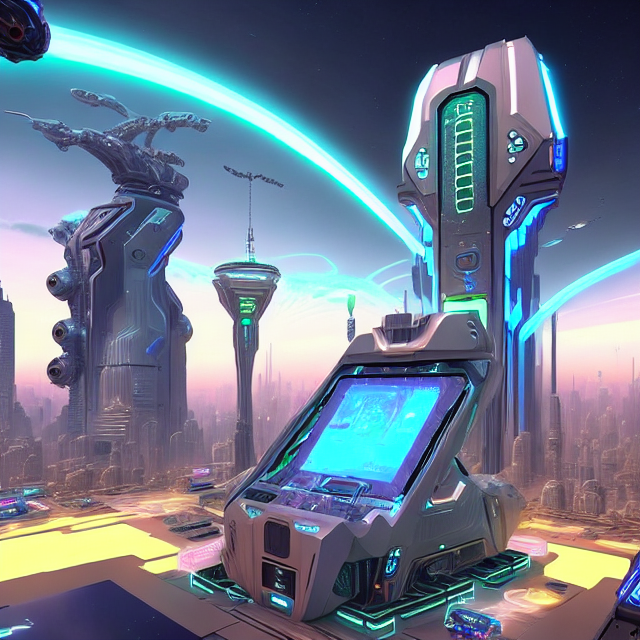

In [7]:
image

[PROMPT]:  A futuristic digital world named 'Aorb,' built through the collaboration of Amir from Pakistan and Eric from Poland. The scene showcases a vast cybernetic city with glowing AI-powered structures, holographic data streams, and intelligent robotic assistants. Amir, a visionary AI engineer, is depicted with a high-tech tablet, designing algorithms in mid-air. Eric, a digital architect, is constructing towering virtual skyscrapers with holographic blueprints. The world of Aorb blends elements of Eastern and Western culture, symbolizing innovation and unity, with a skyline filled with neon-lit buildings, floating data cubes, and a digital sun rising over the horizon. The atmosphere is vibrant, with a glowing network of AI circuits flowing beneath their feet, representing the heart of their creation.



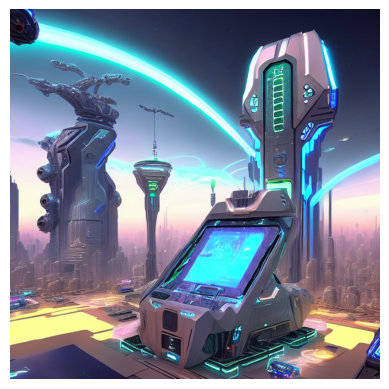

In [8]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [9]:

prompt2 = """A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris



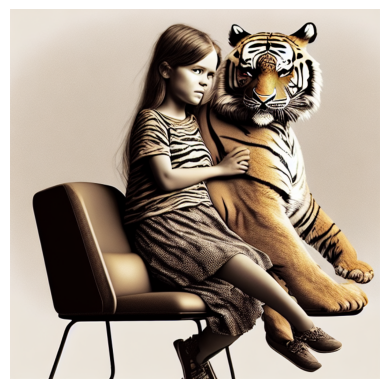

In [10]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

https://huggingface.co/docs/diffusers/using-diffusers/loading

### Working with Stable Diffusion parameters
1. Negative prompting
2. num_inference_steps
3. height
4. weight
5. num_images_per_prompt

In [11]:

def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [12]:
prompt = "Amir, the founder of Asghar Foundation, is seen in a heartwarming scene helping poor people in need. He stands in the center of a vibrant yet humble community, distributing food, clothes, and educational supplies to children and families. The foundation's banner, with its name 'Asghar Foundation,' is visible in the background, symbolizing hope and kindness. Around him, volunteers assist in organizing donations, while children smile as they receive books and school bags. The environment is warm and welcoming, with a mix of urban and rural settings, showing the foundation’s widespread impact. The image radiates compassion, generosity, and the power of giving back to society."

params = {}

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['assist in organizing donations , while children smile as they receive books and school bags . the environment is warm and welcoming , with a mix of urban and rural settings , showing the foundation ’ s widespread impact . the image radiates compassion , generosity , and the power of giving back to society .']


  0%|          | 0/50 [00:00<?, ?it/s]

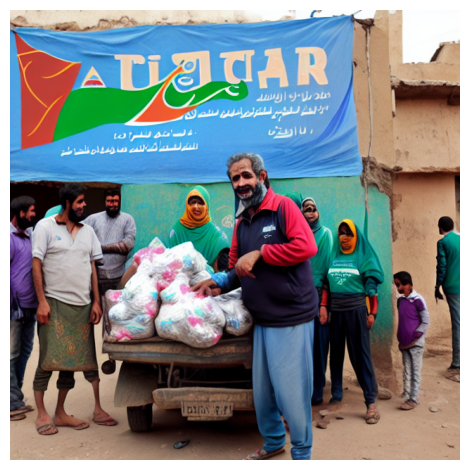

In [14]:
generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['assist in organizing donations , while children smile as they receive books and school bags . the environment is warm and welcoming , with a mix of urban and rural settings , showing the foundation ’ s widespread impact . the image radiates compassion , generosity , and the power of giving back to society .']


  0%|          | 0/100 [00:00<?, ?it/s]

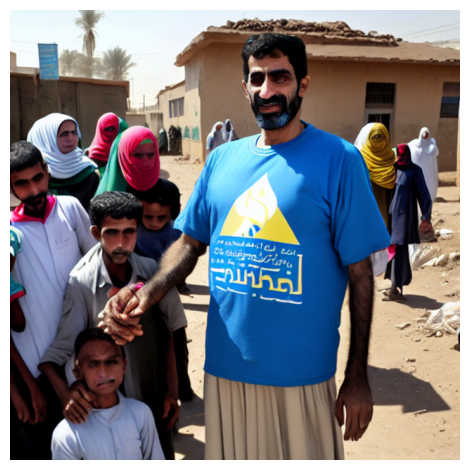

In [15]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

In [16]:
prompt = "Amir, a skilled Data Scientist at Microsoft, is seen working in a high-tech office with multiple screens displaying complex AI models, data visualizations, and predictive analytics. He is deeply focused, analyzing vast datasets and optimizing machine learning algorithms. The Microsoft logo is subtly visible on a glass wall in the background, along with a futuristic workspace filled with holographic data projections and cloud computing dashboards. The atmosphere is dynamic, with a team of experts collaborating on cutting-edge AI innovations. The scene represents the power of data science in shaping the future, highlighting Amir's expertise and contributions to technological advancements."

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["projections and cloud computing dashboards . the atmosphere is dynamic , with a team of experts collaborating on cutting - edge ai innovations . the scene represents the power of data science in shaping the future , highlighting amir 's expertise and contributions to technological advancements ."]


  0%|          | 0/100 [00:00<?, ?it/s]

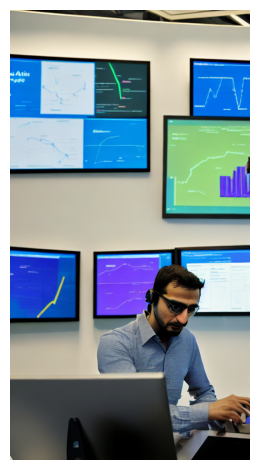

In [17]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["projections and cloud computing dashboards . the atmosphere is dynamic , with a team of experts collaborating on cutting - edge ai innovations . the scene represents the power of data science in shaping the future , highlighting amir 's expertise and contributions to technological advancements ."]


  0%|          | 0/100 [00:00<?, ?it/s]

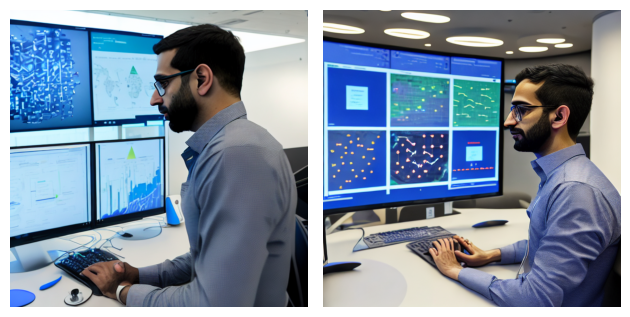

In [18]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["projections and cloud computing dashboards . the atmosphere is dynamic , with a team of experts collaborating on cutting - edge ai innovations . the scene represents the power of data science in shaping the future , highlighting amir 's expertise and contributions to technological advancements ."]


  0%|          | 0/100 [00:00<?, ?it/s]

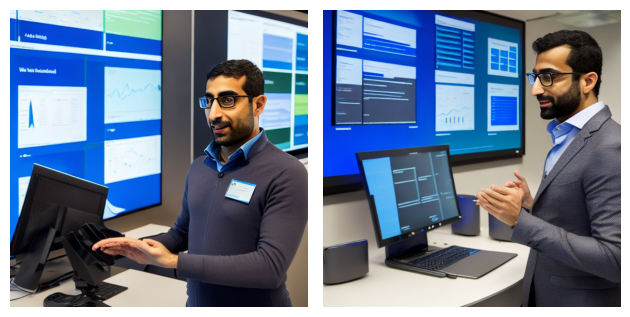

In [19]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)